In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Load data
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


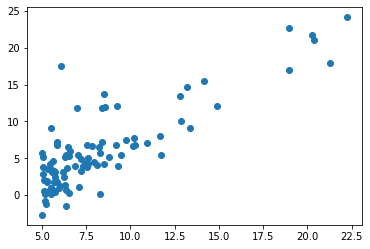

In [5]:
# Plot and analyze the data, where: x - population, y - profit
fig, ax  = plt.subplots()
ax.scatter(data['Population'], data['Profit'])

In [6]:
# Ex. 3 In order to make this cost function work (intercept value θ0 has to be multiplied by 1) we need to insert a column of ones at the beginning of the data frame.
d_len = len(data)
data.insert(0, "Ones", 1)
data.head()


,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
# Ex 4
X = data[['Ones', 'Population']]
y = data['Profit']


In [8]:
X_t = np.matrix(X.values)
y_t = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [9]:
# Ex. 5 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X,y and parameter θ.

def computeCost(X, y, theta):
    inner = np.power((( theta@X.T) - y), 2)
    return np.sum(inner) / (2*X.shape[0])


In [10]:
test1 = computeCost(X_t, y_t, theta)
print(test1)

32.072733877455676


In [11]:
# Ex. 7 Please implement the gradient descent algorithm: the function returns optimized values θ and a vector of the cost function value for each iteration

def simple_gradient(X, y, theta, alpha, it):
    cost = 0
    # m = X.shape[0]
    m = len(X)
    cost = []
    for i in range(it):
        # h = theta@X.T
        # theta0_d = alpha * (1/m)*np.sum(h - y)
        # theta1_d = alpha * (1/m)*np.sum(h - y)*X[:, 1].T
        # theta[0] = theta[0] - theta0_d
        # theta[1] = theta[1] - theta1_d
        theta = theta - alpha*(np.transpose(X).dot(X.dot(theta)-y))/m
        J = computeCost(X, y, theta)
        cost.append(J)
    return theta, cost


In [12]:
simple_gradient(X, y, theta, 0.01, 1000)

ValueError: Dot product shape mismatch, (97, 2) vs (1, 2)